In [31]:
import pyvis
from pyvis.network import Network
import pandas as pd
import sys
import numpy as np
import networkx as nx
import scipy as sp
import matplotlib.pyplot as plt



fraud_net = Network(
    notebook=False,
    cdn_resources="remote",
    bgcolor="#222222",
    font_color="white",
    height="750px",
    width="80%",select_menu=True,filter_menu=True)

#set the physics layout of the network

fraud_net.barnes_hut()
fraud_data = pd.read_csv("C:\\Users\\Dhiraj\\Videos\\Fraud_Detection\\transactiondata.csv")
fraud_data.sort_values(by=['sourceA','destA'],inplace=True,ignore_index=True)
#grouping 
fraud_data = fraud_data.groupby(['sourceA','destA','amount','creditordebit'],sort=False,as_index=False).count()
fraud_data['sourceA'] = fraud_data['sourceA'].astype(str)
fraud_data['destA'] =  fraud_data['destA'].astype(str)
fraud_data['amount']= fraud_data['amount'].astype(str)



sources = fraud_data['sourceA']
targets = fraud_data['destA']
amount =  fraud_data['amount']

edge_data = zip(sources, targets, amount)
for e in edge_data: 
    src = e[0]
    dst = e[1]
    w = e[2]
    fraud_net.add_node(src, src, title=src)
    fraud_net.add_node(dst, dst, title=dst)
    fraud_net.add_edge(src, dst, value=w)
    

neighbor_map = fraud_net.get_adj_list()
# add neighbor data to node hover data
for node in fraud_net.nodes:
    node["title"] += "->transactions are From: " + \
    ",".join(neighbor_map[node["id"]])+"\n"
    node["value"] = len(neighbor_map[node["id"]])
    



fraud_net.force_atlas_2based()
fraud_net.show_buttons(filter_=True)
fraud_net.show("index.html")


In [32]:
# graph visualization and analysis on graph

# create graph from pandas data frame
# create Graph object 
G = nx.from_pandas_edgelist(fraud_data,source='sourceA',
                             target='destA',
                             edge_attr='amount',
                             create_using = nx.Graph()) 

# Graph visualization-Networkx
plt.figure(figsize=(11,8))
#draw circular layout
pos = nx.kamada_kawai_layout(G)
#nx.draw(G,with_labels=True,node_color='skyblue',edge_cmap=plt.cm.Blues,pos = pos)


<Figure size 1100x800 with 0 Axes>

<AxesSubplot: >

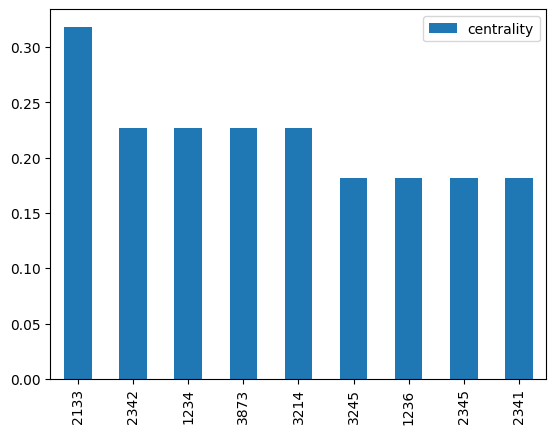

In [33]:
#Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

degree_df = pd.DataFrame.from_dict(degree_dict,orient='index',columns=['centrality'])
#plot top 10 nodes
degree_df.sort_values('centrality',ascending=False)[0:9].plot(kind="bar")


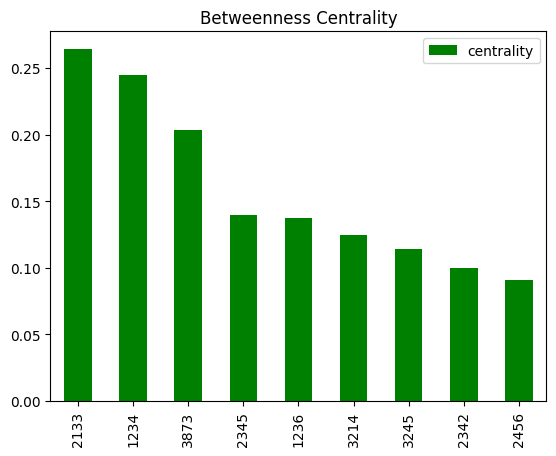

In [7]:
#Betweeness centrality 

betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index',columns=['centrality'])

#Plot top 10 nodes

betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar', color='green')
plt.title('Betweenness Centrality')
plt.show();

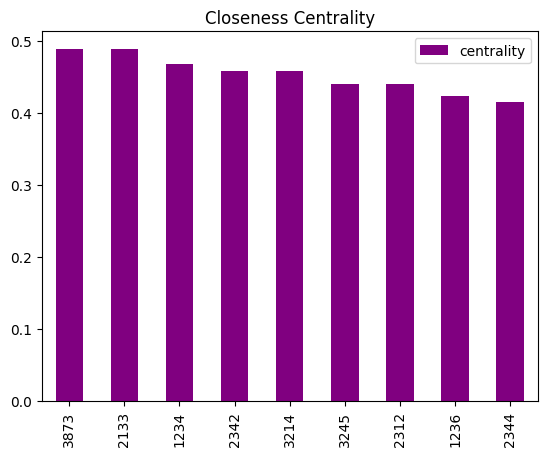

In [8]:
#Closeness Centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index',columns=['centrality'])

#Plot top 10 nodes

closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar', color='purple')
plt.title('Closeness Centrality')
plt.show();

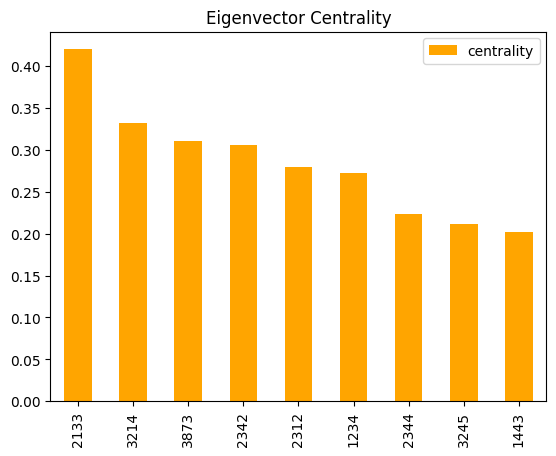

In [9]:
#Prestige/Eigenvector Centrality

prestige_dict= nx.eigenvector_centrality(G)
prestige_df = pd.DataFrame.from_dict(prestige_dict, orient='index',columns=['centrality'])


#Plot top 10 nodes

prestige_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar', color= 'orange')
plt.title('Eigenvector Centrality')
plt.show();